In [1]:
#this model is proposed to scrape data from a specific app's reviews from the play store, and based on a set of predetermined answers, automate replies to reviews.

In [4]:
#google_play_scraper used to scrape reviews from play store with python
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00


In [5]:
from google_play_scraper import app, reviews

In [6]:
app_details = app(
    'com.pbb.pbenterprise',
    lang='en',
)

In [7]:
review_list, _ = reviews(
    'com.pbb.pbenterprise',
    lang='en',
)

In [8]:
review_text = [review['content'] for review in review_list]
review_rating = [review['score'] for review in review_list]

In [12]:
!pip install transformers

In [10]:
from transformers import pipeline

In [11]:
sentiment_analyzer= pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
#sentiments = [sentiment_analyzer(review)[0] for review in review_list]

review_texts = [review['content'] for review in review_list]

# Step 2: Load the sentiment analysis model using default model Hugging Face use for sentiment analysis
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 3: Analyze sentiment of all reviews in batch
sentiments = sentiment_analyzer(review_texts)

# Step 4: Output the results (review + sentiment)
for review, sentiment in zip(review_texts, sentiments):
    print(f"Review: {review}\nSentiment: {sentiment['label']}, Confidence: {sentiment['score']:.2f}\n")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Review: The account added just gone without any notice? Please help!?
Sentiment: NEGATIVE, Confidence: 1.00

Review: Best app and banking system.. ☺️
Sentiment: POSITIVE, Confidence: 1.00

Review: Apps sampah
Sentiment: POSITIVE, Confidence: 0.91

Review: Weak app. Keep encountering error. Not user friendly. Keyboard response super slow although not sure is for safety purpose.
Sentiment: NEGATIVE, Confidence: 1.00

Review: App is supposed to make life easy & convenient. This app is only for "view & approval". I need an app that allows fund transfer, payment etc for enterprise.
Sentiment: NEGATIVE, Confidence: 1.00

Review: I also used other banks' online apps, eg, M2U and HLB, non is as complicated and as laggy as this PB Enterprise app's approval process. PB online banking also cannot be used on Win7 PC d, while other banks' online still useable. PB's online banking system really unfriendly.
Sentiment: NEGATIVE, Confidence: 1.00

Review: I am extremely disappointed with your PBE app e

In [14]:
def get_predefined_reply(sentiment_label):
    if sentiment_label == 'POSITIVE':
        return "Thank you for your feedback. We're glad you enjoyed the app."
    elif sentiment_label == 'NEGATIVE':
        return "We're sorry to hear about your experience. Could you please provide more details to so we can assist you further?"
    else:
        return "Thank you for your review. We're constantly improving our app, and your feedback helps make the app better."

Visualizing the nature of (sentiment type) of the reviews in this app.

In [18]:
sentiment_counts = {
    'POSITIVE': 0,
    'NEGATIVE': 0
}

In [19]:
for sentiment in sentiments:
  label=sentiment['label']
  sentiment_counts[label] +=1

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

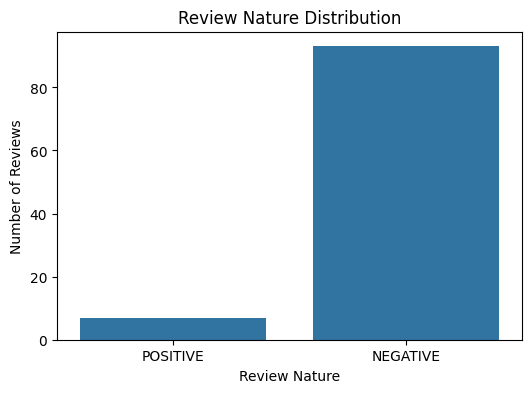

In [27]:
#bar chart

plt.figure(figsize=(6, 4))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title('Review Nature Distribution')
plt.xlabel('Review Nature')
plt.ylabel('Number of Reviews')
plt.show()

In [30]:
import numpy as np
from scipy import stats
import pandas as pd

In [36]:
sentiment_scores = [sentiment['score'] for sentiment in sentiments]

In [38]:
data = pd.DataFrame({
    'review': review_list,
    'rating': review_rating,
    'sentiment_score': sentiment_scores
})

In [39]:
Q1_rating = data['rating'].quantile(0.25)
Q3_rating = data['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

In [40]:
rating_outliers = data[(data['rating'] < Q1_rating - 1.5 * IQR_rating) | (data['rating'] > Q3_rating + 1.5 * IQR_rating)]

In [41]:
data['z_score_sentiment'] = np.abs(stats.zscore(data['sentiment_score']))

In [42]:
sentiment_outliers = data[data['z_score_sentiment'] > 3]

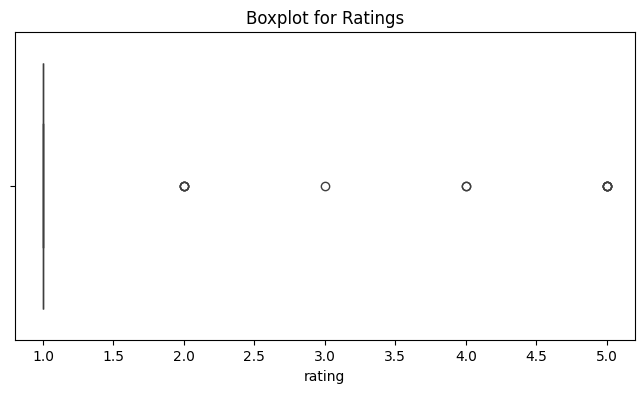

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='rating')
plt.title('Boxplot for Ratings')
plt.show()

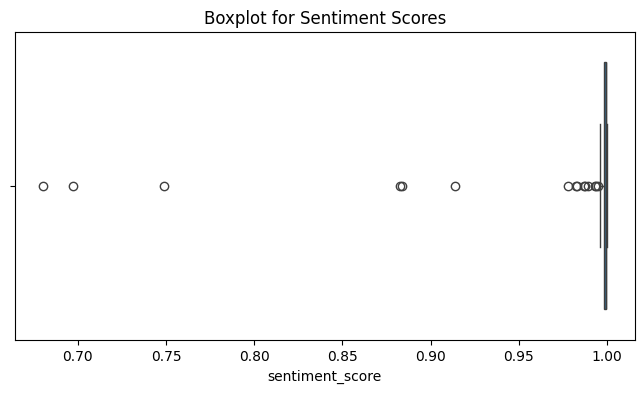

In [44]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='sentiment_score')
plt.title('Boxplot for Sentiment Scores')
plt.show()

In [45]:
print("Rating Outliers:")
print(rating_outliers)

print("\nSentiment Score Outliers:")
print(sentiment_outliers)

Rating Outliers:
                                               review  rating  sentiment_score
0   {'reviewId': 'a33d5bbb-8d86-467f-9948-a3560d10...       3         0.998123
1   {'reviewId': '4e00e598-ea73-4b8a-b58b-f77c7a11...       5         0.999664
5   {'reviewId': 'a7a4f3da-f9b7-4660-8f09-c6cde890...       2         0.999469
12  {'reviewId': 'c6c4057b-eae9-4b93-8000-509d71bf...       2         0.748637
14  {'reviewId': '1e007604-5808-490c-9921-5e197301...       2         0.998804
27  {'reviewId': '214de682-899c-492e-9234-657e711b...       5         0.999816
34  {'reviewId': 'e49331c5-2f33-489a-afa3-90c572c2...       5         0.999816
50  {'reviewId': '4231e4e4-9b2f-47bf-b9f3-73f95a54...       4         0.987068
61  {'reviewId': 'c8572b57-60e9-4d92-818f-b5b239e2...       4         0.999079
70  {'reviewId': '88e82e4e-b871-48c4-97ee-6f0bb2cf...       5         0.998854
72  {'reviewId': 'bd03f1bd-64d3-4a42-93a3-78e71ff9...       5         0.994928
95  {'reviewId': 'd99412e9-5876-4da

In [46]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def generate_reply(review_text):
    inputs = tokenizer.encode("Reply to: " + review_text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=100, do_sample=True)
    reply = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return reply


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extract features from the reviews
count_vectorizer = CountVectorizer(stop_words='english')
term_matrix = count_vectorizer.fit_transform(review_texts)

# Apply LDA to discover topics in the reviews
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(term_matrix)

# Extract and display the topics
topics = lda_model.components_

Testing the automated reply with random review.

In [53]:
#Test 1
test_review = "I can make transactions easily."
response = test_reply_model(test_review)
print(f"Review: {test_review}\nReply: {response}\n")

#Test 2
test_review_2 = "This app keeps crashing. Very annoying"
response_2 = test_reply_model(test_review_2)
print(f"Review: {test_review_2}\nReply: {response_2}\n")


Review: I can make transactions easily.
Reply: Thank you for your feedback! We're glad you enjoyed the app.

Review: This app keeps crashing. Very annoying
Reply: We're sorry to hear about your experience. Could you please provide more details so we can assist you further?

